<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go


from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

pn.extension('plotly')

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, cols, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las cols de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

### Solución

**Nota: Se usarán las bases correspondientes a los primeros semestres (2019-2021) debido a las restricciones en el tamaño de los archivos.**

In [2]:
#Leer los datos y unirlos 

d20211 = pd.read_csv("Archivos/SB11_20211.txt", sep = "¬")
d20201 = pd.read_csv("Archivos/SB11_20201.txt", sep = "¬")
Data = d20211.append(d20201, ignore_index = True)

print("Filas: {}, Columnas: {}".format(Data.shape[0], Data.shape[1]))

<ipython-input-2-8b13f133764e>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  d20211 = pd.read_csv("Archivos/SB11_20211.txt", sep = "¬")
<ipython-input-2-8b13f133764e>:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  d20201 = pd.read_csv("Archivos/SB11_20201.txt", sep = "¬")


Filas: 30963, Columnas: 82


In [3]:
#Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

sub_conjunto = [
    "ESTU_GENERO",
    "ESTU_TIENEETNIA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_NUMLIBROS",
    "FAMI_SITUACIONECONOMICA",
    "COLE_CALENDARIO",
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES",
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]

print("Se seleccionarion {} variables.".format(len(sub_conjunto)))

Se seleccionarion 19 variables.


In [4]:
#Inspeccionar el archivo a partir de su encabezado, cols, descripciones de las variables según su tipo (numéricas, categóricas).

Sec_analisis = Data[sub_conjunto]
Sec_analisis.tail()

,ESTU_GENERO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_NUMLIBROS,FAMI_SITUACIONECONOMICA,COLE_CALENDARIO,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
30958,F,No,Estrato 4,Si,Si,26 A 100 LIBROS,Igual,B,61,25,72,60,62.0,64,50,64,60,73.0,303
30959,F,No,Estrato 5,Si,Si,MÁS DE 100 LIBROS,Igual,B,82,85,91,86,100.0,70,72,72,70,100.0,366
30960,F,No,Estrato 5,Si,NaN,26 A 100 LIBROS,NaN,B,85,68,75,69,77.0,71,66,65,64,79.0,337
30961,F,No,Estrato 2,No,No,0 A 10 LIBROS,Peor,A,44,21,38,30,11.0,59,48,52,47,40.0,253
30962,M,No,Estrato 5,Si,Si,26 A 100 LIBROS,Igual,B,83,84,96,81,74.0,70,72,75,68,78.0,359


In [5]:
#Variables que pueden ser de interés para la problemática planteada

lista_catego = [
    "ESTU_GENERO",
    "ESTU_TIENEETNIA",
    "FAMI_ESTRATOVIVIENDA",
    "FAMI_TIENEINTERNET",
    "FAMI_TIENECOMPUTADOR",
    "FAMI_NUMLIBROS",
    "FAMI_SITUACIONECONOMICA",
    "COLE_CALENDARIO",
]

lista_num = [
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]

lista_percen = [
    "PERCENTIL_LECTURA_CRITICA",
    "PERCENTIL_MATEMATICAS",
    "PERCENTIL_C_NATURALES",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PERCENTIL_INGLES"
]

In [6]:
#Obtener el % de faltantes por columna
row = Sec_analisis.shape[0]
Sec_analisis.isnull().sum() / row * 100

ESTU_GENERO                      0.019378
ESTU_TIENEETNIA                  7.928818
FAMI_ESTRATOVIVIENDA             7.473436
FAMI_TIENEINTERNET               7.134322
FAMI_TIENECOMPUTADOR             6.291380
FAMI_NUMLIBROS                   8.655492
FAMI_SITUACIONECONOMICA          6.530375
COLE_CALENDARIO                  0.000000
PERCENTIL_LECTURA_CRITICA        0.000000
PERCENTIL_MATEMATICAS            0.000000
PERCENTIL_C_NATURALES            0.000000
PERCENTIL_SOCIALES_CIUDADANAS    0.000000
PERCENTIL_INGLES                 0.151794
PUNT_LECTURA_CRITICA             0.000000
PUNT_MATEMATICAS                 0.000000
PUNT_C_NATURALES                 0.000000
PUNT_SOCIALES_CIUDADANAS         0.000000
PUNT_INGLES                      0.268062
PUNT_GLOBAL                      0.000000
dtype: float64

In [7]:
#Porcentaje de datos faltantes o no válidos hay en las cols de interés
Sec_analisis = Sec_analisis.dropna()
Del = row - Sec_analisis.shape[0]
print("Se quitan {} datos, que representan el {}%. quedandonos con {} datos"
      .format(Del, Del/row * 100, Sec_analisis.shape[0]))

Se quitan 4993 datos, que representan el 16.125698414236346%. quedandonos con 25970 datos


In [8]:
print("Los archivos inicialmente tenían 30963 filas y 82 Columnas")
print("Se tiene para el análisis el primer periodo de los años 2020 y 2021")
print("Se tomaron 19 variables de interés que pueden ayudar en el desarrollo del objetivo")
print("Se encuantran 4993 datos faltantes, que representan el 16.12% del total de los datos, estos datos faltantes pueden afectar el resultado de los modelos que se corran por lo cual se decide eliminarlos quedandonos con 25970 datos")


Los archivos inicialmente tenían 30963 filas y 82 Columnas
Se tiene para el análisis el primer periodo de los años 2020 y 2021
Se tomaron 19 variables de interés que pueden ayudar en el desarrollo del objetivo
Se encuantran 4993 datos faltantes, que representan el 16.12% del total de los datos, estos datos faltantes pueden afectar el resultado de los modelos que se corran por lo cual se decide eliminarlos quedandonos con 25970 datos


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

### Solución

Usando el dataframe obtenido anteriormente, lo primero que podríamos hacer es generar una matriz de correlación entre las variables numéricas, visualizada como un mapa de calor.

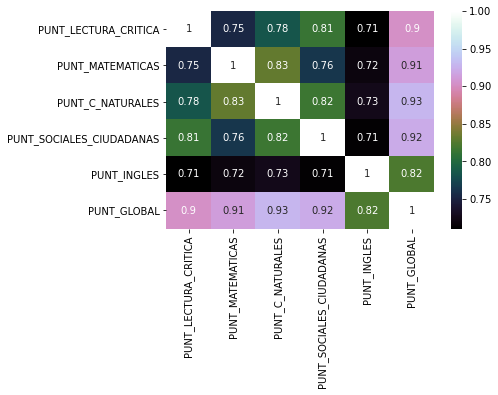

In [9]:
DScore = Sec_analisis.drop(lista_percen, axis = 1)
sns.heatmap(DScore.corr(), cmap = "cubehelix", annot=True);

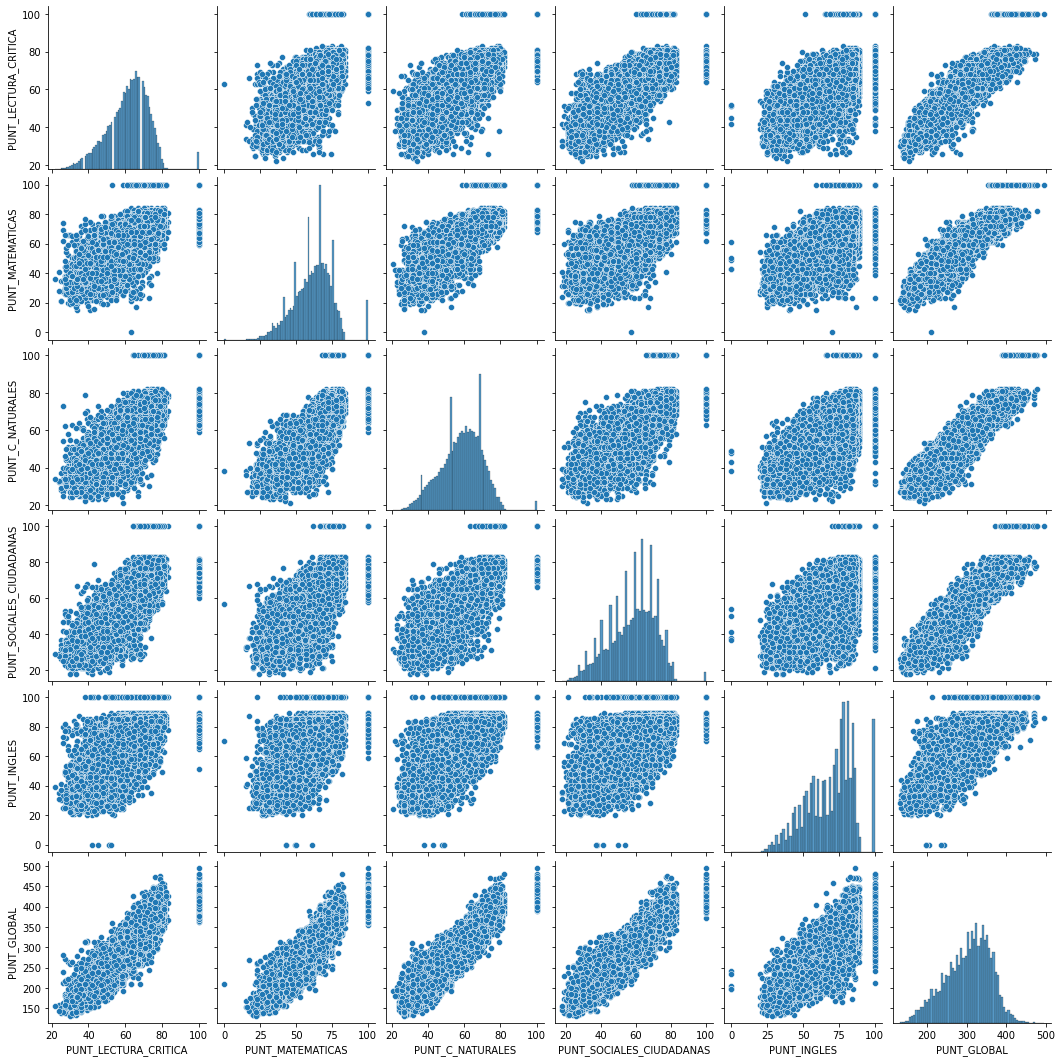

In [10]:
sns.pairplot(DScore)

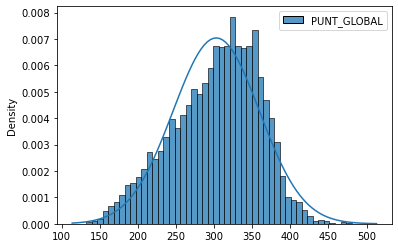

In [11]:
x = Sec_analisis[['PUNT_GLOBAL']]
ax = sns.histplot(x, bins=50, stat='density')
mu, std = stats.norm.fit(x)
xx = np.linspace(*ax.get_xlim(),100)
ax.plot(xx, stats.norm.pdf(xx, mu, std));

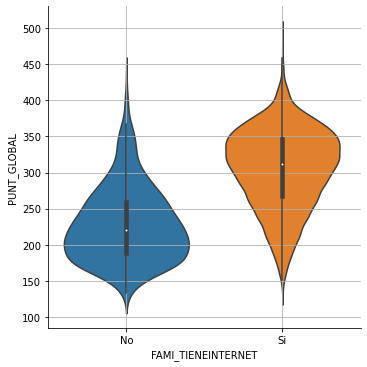

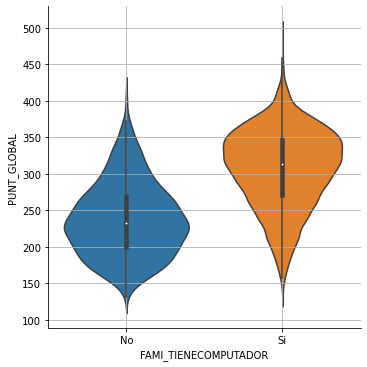

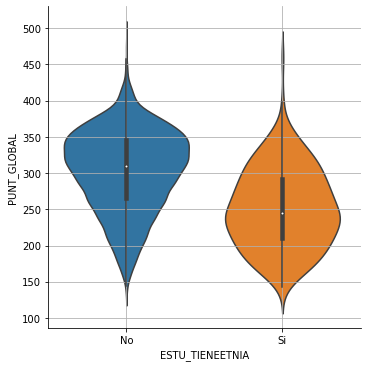

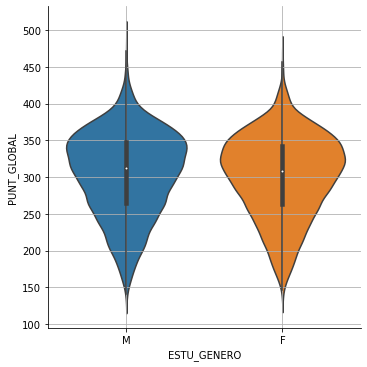

In [13]:
# FAMI_TIENEINTERNET

VaPrese = []

sns.catplot(x = "FAMI_TIENEINTERNET", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

VaPrese.append("FAMI_TIENEINTERNET")

# FAMI_TIENECOMPUTADOR
sns.catplot(x = "FAMI_TIENECOMPUTADOR", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

VaPrese.append("FAMI_TIENECOMPUTADOR")

#ESTU_TIENEETNIA
sns.catplot(x = "ESTU_TIENEETNIA", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = ["No", "Si"], kind = "violin")
plt.grid()

VaPrese.append("ESTU_TIENEETNIA")

#ESTU_GENERO
sns.catplot(x = "ESTU_GENERO", y = "PUNT_GLOBAL", data = Sec_analisis, kind = "violin")
plt.grid()

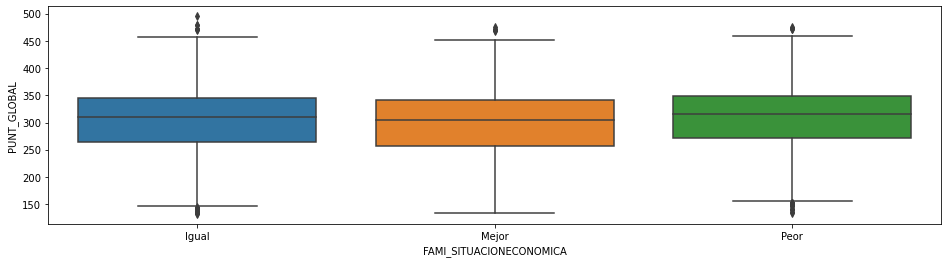

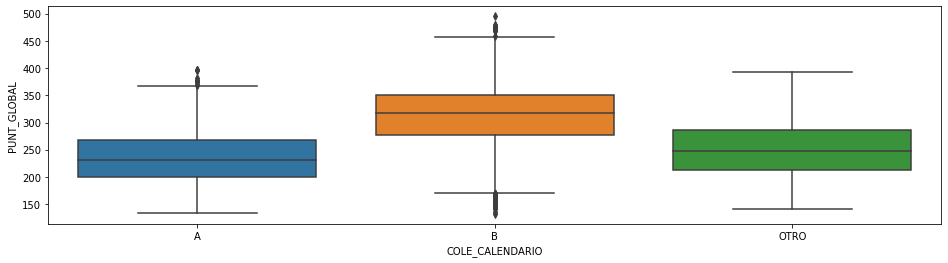

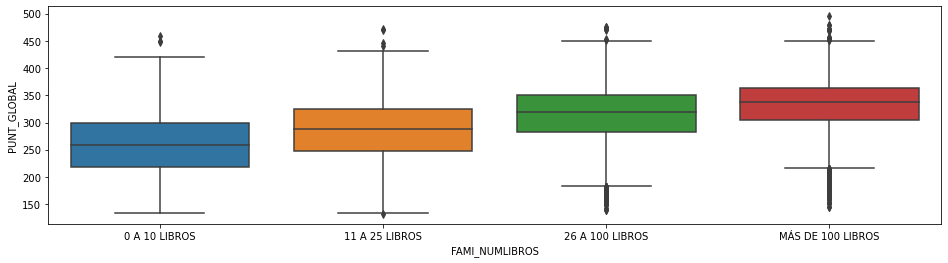

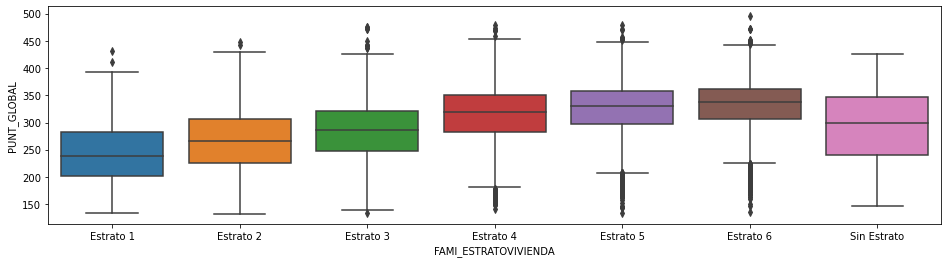

In [14]:
# FAMI_SITUACIONECONOMICA
plt.figure(figsize=(16,4))
sns.boxplot(x = "FAMI_SITUACIONECONOMICA", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = sorted(Sec_analisis["FAMI_SITUACIONECONOMICA"].unique()))
# COLE_CALENDARIO
plt.figure(figsize=(16,4))
sns.boxplot(x = "COLE_CALENDARIO", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = sorted(Sec_analisis["COLE_CALENDARIO"].unique()))

VaPrese.append("COLE_CALENDARIO")
# FAMI_NUMLIBROS
plt.figure(figsize=(16,4))
sns.boxplot(x = "FAMI_NUMLIBROS", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = sorted(Sec_analisis["FAMI_NUMLIBROS"].unique()))

VaPrese.append("FAMI_NUMLIBROS")

#FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(16,4)) # Solo es tenido en cuenta para boxplot.
sns.boxplot(x = "FAMI_ESTRATOVIVIENDA", y = "PUNT_GLOBAL", data = Sec_analisis,
            order = sorted(Sec_analisis["FAMI_ESTRATOVIVIENDA"].unique()))

VaPrese.append("FAMI_ESTRATOVIVIENDA")

In [15]:
print("Se encuentra que todas las variables tienen una alta correlación con el puntaje global, sin embargo, entres ellas no presentan una alta correlación entre ellos")
print("Los datos presentan un comportamiento normal, leptocurtico, con una asímetría hacia la derecha")
print("Se encuentran variables que no afectan significativamente el puntaje global como: ESTU_GENERO, FAMI_SITUACIONECONOMICA")
print("mientras que: ESTU_TIENEETNIA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_TIENECOMPUTADOR, FAMI_NUMLIBROS, COLE_CALENDARIO, afectan significativamente el puntage global")


Se encuentra que todas las variables tienen una alta correlación con el puntaje global, sin embargo, entres ellas no presentan una alta correlación entre ellos
Los datos presentan un comportamiento normal, leptocurtico, con una asímetría hacia la derecha
Se encuentran variables que no afectan significativamente el puntaje global como: ESTU_GENERO, FAMI_SITUACIONECONOMICA
mientras que: ESTU_TIENEETNIA, FAMI_ESTRATOVIVIENDA, FAMI_TIENEINTERNET, FAMI_TIENECOMPUTADOR, FAMI_NUMLIBROS, COLE_CALENDARIO, afectan significativamente el puntage global


# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

### Solución


A partir del análisis gráfico realizado en la misión anterior, estas son las variables que se han determinado como significativas para el modelo. Con las variables de percentil posteriormente se va a definir si el estudiante está o no en riesgo.

Se prefiere usar el percentil real obtenido en lo datos de la prueba sobre un percentil calculado, debido al procesamiento de los datos realizados previamente, además de ser la representación más acertada.

In [16]:
VaModel = []
VaModel.extend(lista_percen)
DModel = Sec_analisis[VaModel]
DModel = pd.get_dummies(DModel, drop_first = True)
DModel.head()

,PERCENTIL_LECTURA_CRITICA,PERCENTIL_MATEMATICAS,PERCENTIL_C_NATURALES,PERCENTIL_SOCIALES_CIUDADANAS,PERCENTIL_INGLES
0,50,49,59,40,35.0
1,57,74,64,53,45.0
2,100,60,63,90,46.0
3,48,31,35,32,33.0
4,30,64,33,34,33.0


In [27]:
percentil = 70

def calcular_riesgo(row):
    riesgo = 0
    if row['PERCENTIL_LECTURA_CRITICA'] < percentil:
        riesgo += 1
    if row['PERCENTIL_MATEMATICAS'] < percentil:
        riesgo += 1
    if row['PERCENTIL_C_NATURALES'] < percentil:
        riesgo += 1
    if row['PERCENTIL_SOCIALES_CIUDADANAS'] < percentil:
        riesgo += 1
    if row['PERCENTIL_INGLES'] < percentil:
        riesgo += 1
        
    if riesgo >= 3:
        return 1
    
    else:
        return 0
    
DModel["RIESGO"] = DModel.apply(lambda row: calcular_riesgo(row), axis = 1)

In [28]:
DModel.groupby(['RIESGO']).size()

RIESGO
0     8702
1    17268
dtype: int64

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

### Solución

Dado que todas las variables presentes en el modelo son variables categóricas, podemos jugar con las diferentes combinaciones entre estas y ver cómo se afectan los puntajes, las variables dependientes.

In [37]:
Panel = []
Panel.extend(lista_catego)
Panel.extend(lista_percen) 
Panel.extend(lista_num)

DPanel = Sec_analisis[Panel].copy()
DPanel["RIESGO"] = DPanel.apply(lambda row: calcular_riesgo(row), axis = 1)
lista_num.append("RIESGO")
DPanel.head()

KeyError: "['RIESGO'] not in index"

In [42]:
titulo = "#Panel"

def crear(x):
    c = DPanel.groupby(x).mean().reset_index()
    return px.bar(c, x = x, y = "PUNT_GLOBAL", color = x,
                 title = "{} comparado {}".format(x, "PUNT_GLOBAL"))

desplegable = pn.widgets.Select(
    value = lista_catego[0],
    options = lista_catego
)

    
@pn.depends(desplegable.param.value)
def construir(desplegable ):
    return crear(desplegable )


pn.Column(pn.Row(titulo),
                    pn.Row(desplegable),
                    pn.Row(pn.Card(construir)))


Column
    [0] Row
        [0] Markdown(str)
    [1] Row
        [0] Select(options=['ESTU_GENERO', ...], value='ESTU_GENERO')
    [2] Row
        [0] Card
            [0] ParamFunction(function)

In [43]:
print("¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?")
print("¿Como se relacionan las variable con respecto al puntaje global?, y aportaría al análisis mostrando graficamente el comportamiento de las variables, pudiendolas comparar de una forma fácil y rápida")
print("¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?")
print("Puede comparar como se comporta una variable con respecto al puntaje global")

¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
¿Como se relacionan las variable con respecto al puntaje global?, y aportaría al análisis mostrando graficamente el comportamiento de las variables, pudiendolas comparar de una forma fácil y rápida
¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?
Puede comparar como se comporta una variable con respecto al puntaje global
